<a href="https://colab.research.google.com/github/taraudani/knn-FORK/blob/main/assignment_knn_visualization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Assignment 3: $k$ Nearest Neighbor

**Do two questions.**

`! git clone https://github.com/ds4e/knn`

**Q0.**
1. What is the difference between regression and classification?
2. What is a confusion table? What does it help us understand about a model's performance?
3. What does the SSE quantify about a particular model?
4. What are overfitting and underfitting?
5. Why does splitting the data into training and testing sets, and choosing $k$ by evaluating accuracy or SSE on the test set, improve model performance?
6. With classification, we can report a class label as a prediction or a probability distribution over class labels. Please explain the strengths and weaknesses of each approach.

**ANSWERS:**
1. Regression is used for prediction of continuous variables like temperature or number, while classification is used for prediction of categorical variables such as prediction if an email is spam or not. Regression will output a number, while classification will output a category.

2. A confusion table is a matrix that helps understand a classification model by comparing predicted and actual positive and negative values to get false positive, false negative, true positive, and true negative values. This helps us understand where the model makes mistakes (FP, FN), and it helps compute accuracy metrics.

3. The SSE tells us how well a regression model fits the data by comparing actual and predicted values. The lower the SSE, the closer the prediction is to the actual values, the higher the SSE the less accurate the prediction is to the actual values.

4. Overfitting is when the model is too complex and fits to every individual data point too exactly. It may perform well on training data but not well on actual data. Underfitting is when the model is too simple and fails to capture the trends and patterns that are significant, performing poorly on both the training and actual data.

5. The training set is used to fit the model, while the test set is used to evaluate how well the model generalizes. This helps ensure that the model isn't just memorizing trianing data and prevents overfitting. It also helps to choose k by evaluating accuracy or SSE on the test set because they are less prone to overfitting.

6. With a class label as a prediction, the model outputs the most likely category which is simple and interpretable, but also does not indicate uncertainty or confidence in predictions. With a probability distribution, the model outputs probabilities for each class which makes it so we have confidence levels, but it is harder to interpret directly and use in decision-making.  

**Q6.** This is a case study on $k$ nearest neighbor regression and imputation, using the `airbnb_hw.csv` data.

There are 30,478 observations, but only 22,155 ratings. We're going to build a kNN regressor to impute missing values. This is a common task, and illustrates one way you can use kNN in the future even when you have more advanced models available.

1. Load the `airbnb_hw.csv` data with Pandas. We're only going to use `Review Scores Rating`, `Price`, and `Beds`, so use `.loc` to reduce the dataframe to those variables.
2. Set use `.isnull()` to select the subset of the dataframe with missing review values. Set those aside in a different dataframe. We'll make predictions about them later.
3. Use `df = df.dropna(axis = 0, how = 'any')` to eliminate any observations with missing values/NA's from the dataframe.
4. For the complete cases, create a $k$-NN model that uses the variables `Price` and `Beds` to predict `Review Scores Rating`. How do you choose $k$? (Hint: Train/test split, iterate over reasonable values of $k$ and find a value that minimizes SSE on the test split using predictions from the training set.)
5. Predict the missing ratings.
6. Do a kernel density plot of the training ratings and the predicted missing ratings. Do they look similar or not? Explain why.

In [2]:
from google.colab import files
files.upload()

Saving airbnb_hw.csv to airbnb_hw.csv


{'airbnb_hw.csv': b'Host Id,Host Since,Name,Neighbourhood ,Property Type,Review Scores Rating (bin),Room Type,Zipcode,Beds,Number of Records,Number Of Reviews,Price,Review Scores Rating\n5162530,,1 Bedroom in Prime Williamsburg,Brooklyn,Apartment,,Entire home/apt,11249.0,1.0,1,0,145,\n33134899,,"Sunny, Private room in Bushwick",Brooklyn,Apartment,,Private room,11206.0,1.0,1,1,37,\n39608626,,Sunny Room in Harlem,Manhattan,Apartment,,Private room,10032.0,1.0,1,1,28,\n500,6/26/2008,Gorgeous 1 BR with Private Balcony,Manhattan,Apartment,,Entire home/apt,10024.0,3.0,1,0,199,\n500,6/26/2008,Trendy Times Square Loft,Manhattan,Apartment,95.0,Private room,10036.0,3.0,1,39,549,96.0\n1039,7/25/2008,Big Greenpoint 1BD w/ Skyline View,Brooklyn,Apartment,100.0,Entire home/apt,11222.0,1.0,1,4,149,100.0\n1783,8/12/2008,Amazing Also,Manhattan,Apartment,100.0,Entire home/apt,10004.0,1.0,1,9,250,100.0\n2078,8/15/2008,"Colorful, quiet, & near the subway!",Brooklyn,Apartment,90.0,Private room,11201.0,1.0,1

In [4]:
import pandas as pd
df = pd.read_csv("airbnb_hw.csv")

#isolating the variables into df
df = df.loc[:, ['Review Scores Rating', 'Price', 'Beds']]

Review Scores Rating Price  Beds
0                       NaN   145   1.0
1                       NaN    37   1.0
2                       NaN    28   1.0
3                       NaN   199   3.0
4                      96.0   549   3.0
...                     ...   ...   ...
30473                   NaN   300   5.0
30474                   NaN   125   2.0
30475                   NaN    80   1.0
30476                   NaN    35   1.0
30477                   NaN    80   1.0

[30478 rows x 3 columns]

In [11]:
#making dataframe of missing values
df_missing = df[df['Review Scores Rating'].isnull()]

#dataframe with dropped nan values
df_complete = df.dropna(axis=0, how='any')

#re-formatting price variable for consistency
df['Price'] = df['Price'].replace('[\$,]', '', regex=True).astype(float)

In [12]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error

#defining features to X and y
X = df_complete[['Price', 'Beds']]
y = df_complete['Review Scores Rating']

#train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#iterating over different values of k
sse = {}
for k in range(1, 21):
    knn = KNeighborsRegressor(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    sse[k] = mean_squared_error(y_test, y_pred)  #SSE is MSE * number of samples

#finding the best k using sum of squared errors
best_k = min(sse, key=sse.get)
print(f"Best k: {best_k}")


Best k: 18


In [21]:
#training the model with the best k
knn = KNeighborsRegressor(n_neighbors=best_k)

#training on the full complete (no nan) dataset
knn.fit(X, y)

#dropping rows with missing values from 'price' and 'beds'
X_missing = X_missing.dropna()

#predicting missing ratings from cleaned X_missing
df_missing.loc[X_missing.index, 'Review Scores Rating'] = knn.predict(X_missing)


<ipython-input-23-d65e6b603c6e>:5: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df_complete['Review Scores Rating'], label="Actual Ratings", shade=True)
<ipython-input-23-d65e6b603c6e>:6: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df_missing['Review Scores Rating'], label="Predicted Ratings", shade=True)


Text(0.5, 1.0, 'KDE Actual versus Predicted Ratings')

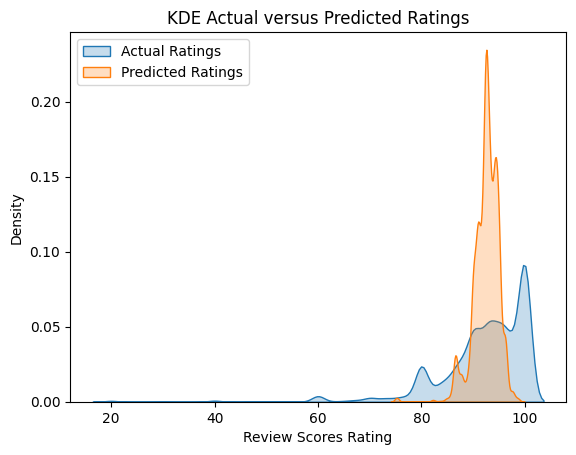

In [23]:
import seaborn as sns
import matplotlib.pyplot as plt

#KDE plot of actual vs predicted ratings
sns.kdeplot(df_complete['Review Scores Rating'], label="Actual Ratings", shade=True)
sns.kdeplot(df_missing['Review Scores Rating'], label="Predicted Ratings", shade=True)
plt.legend()
plt.title("KDE Actual versus Predicted Ratings")

The actual and predicted ratings have a similar range of values, however, the predicted ratings are much more highly concentrated in one area than the actual ratings. This could be due to the fact that kNN averages nearby values, so the spread is lower, but we can see that price and beds are fairly strong predictors of our review score ratings.

**VISUALIZATION:**

**Q1**. This question provides some practice doing exploratory data analysis and visualization.

The "relevant" variables for this question are:

*   level - Level of institution (4-year, 2-year)
*   aid_value - The average amount of student aid going to undergraduate recipients
*   control - Public, Private not-for-profit, Private for-profit
*   grad_100_value - percentage of first-time, full-time, degree-seeking undergraduates who complete a degree or certificate program within 100 percent of expected time (bachelor's-seeking group at 4-year institutions)

1. Load the ./data/college_completion.csv data with Pandas.
2. What are are the dimensions of the data? How many observations are there? What are the variables included? Use .head() to examine the first few rows of data.
3. Cross tabulate control and level. Describe the patterns you see.
4. For grad_100_value, create a histogram, kernel density plot, boxplot, and statistical description.
5. For grad_100_value, create a grouped kernel density plot by control and by level. Describe what you see. Use groupby and .describe to make grouped calculations of statistical descriptions of grad_100_value by level and control. Which institutions appear to have the best graduation rates?
6. Create a new variable, df['levelXcontrol']=df['level']+', '+df['control'] that interacts level and control. Make a grouped kernel density plot. Which institutions appear to have the best graduation rates?
7. Make a kernel density plot of aid_value. Now group your graph by level and control. What explains the shape of the graph? Use groupby and .describe to make grouped calculations of statistical descriptions of aid_value by level and control.
7. Make a scatterplot of grad_100_value by aid_value. Describe what you see. Now make the same plot, grouping by level and then control. Describe what you see. For which kinds of institutions does aid seem to increase graduation rates?

In [24]:
from google.colab import files
files.upload()

Saving college_completion.csv to college_completion.csv


{'college_completion.csv': b'index,unitid,chronname,city,state,level,control,basic,hbcu,flagship,long_x,lat_y,site,student_count,awards_per_value,awards_per_state_value,awards_per_natl_value,exp_award_value,exp_award_state_value,exp_award_natl_value,exp_award_percentile,ft_pct,fte_value,fte_percentile,med_sat_value,med_sat_percentile,aid_value,aid_percentile,endow_value,endow_percentile,grad_100_value,grad_100_percentile,grad_150_value,grad_150_percentile,pell_value,pell_percentile,retain_value,retain_percentile,ft_fac_value,ft_fac_percentile,vsa_year,vsa_grad_after4_first,vsa_grad_elsewhere_after4_first,vsa_enroll_after4_first,vsa_enroll_elsewhere_after4_first,vsa_grad_after6_first,vsa_grad_elsewhere_after6_first,vsa_enroll_after6_first,vsa_enroll_elsewhere_after6_first,vsa_grad_after4_transfer,vsa_grad_elsewhere_after4_transfer,vsa_enroll_after4_transfer,vsa_enroll_elsewhere_after4_transfer,vsa_grad_after6_transfer,vsa_grad_elsewhere_after6_transfer,vsa_enroll_after6_transfer,vsa_enr

In [27]:
import pandas as pd
df = pd.read_csv('college_completion.csv')

print("Dimensions:", df.shape)
print("Variables:", df.columns)

Dimensions: (3798, 63)
Variables: Index(['index', 'unitid', 'chronname', 'city', 'state', 'level', 'control',
       'basic', 'hbcu', 'flagship', 'long_x', 'lat_y', 'site', 'student_count',
       'awards_per_value', 'awards_per_state_value', 'awards_per_natl_value',
       'exp_award_value', 'exp_award_state_value', 'exp_award_natl_value',
       'exp_award_percentile', 'ft_pct', 'fte_value', 'fte_percentile',
       'med_sat_value', 'med_sat_percentile', 'aid_value', 'aid_percentile',
       'endow_value', 'endow_percentile', 'grad_100_value',
       'grad_100_percentile', 'grad_150_value', 'grad_150_percentile',
       'pell_value', 'pell_percentile', 'retain_value', 'retain_percentile',
       'ft_fac_value', 'ft_fac_percentile', 'vsa_year',
       'vsa_grad_after4_first', 'vsa_grad_elsewhere_after4_first',
       'vsa_enroll_after4_first', 'vsa_enroll_elsewhere_after4_first',
       'vsa_grad_after6_first', 'vsa_grad_elsewhere_after6_first',
       'vsa_enroll_after6_first', 'vsa_

In [28]:
df.head()

index  unitid                            chronname        city    state  \
0      0  100654               Alabama A&M University      Normal  Alabama   
1      1  100663  University of Alabama at Birmingham  Birmingham  Alabama   
2      2  100690                   Amridge University  Montgomery  Alabama   
3      3  100706  University of Alabama at Huntsville  Huntsville  Alabama   
4      4  100724             Alabama State University  Montgomery  Alabama   

    level                 control  \
0  4-year                  Public   
1  4-year                  Public   
2  4-year  Private not-for-profit   
3  4-year                  Public   
4  4-year                  Public   

                                               basic hbcu flagship  ...  \
0  Masters Colleges and Universities--larger prog...    X      NaN  ...   
1  Research Universities--very high research acti...  NaN      NaN  ...   
2            Baccalaureate Colleges--Arts & Sciences  NaN      NaN  ...   
3  Research Universities--very high research acti...  NaN      NaN  ...   
4  Masters Colleges and Universities--larger prog...    X      NaN  ...   

   vsa_grad_after6_transfer  vsa_grad_elsewhere_after6_transfer  \
0                      36.4                                 5.6   
1                       NaN                                 NaN   
2                       NaN                                 NaN   
3                       0.0                                 0.0   
4                       NaN                                 NaN   

  vsa_enroll_after6_transfer  vsa_enroll_elsewhere_after6_transfer  \
0                       17.2                                  11.1   
1                        NaN                                   NaN   
2                        NaN                                   NaN   
3                        0.0                                   0.0   
4                        NaN                                   NaN   

                                             similar  state_sector_ct  \
0  232937|100724|405997|113607|139533|144005|2285...               13   
1  196060|180461|201885|145600|209542|236939|1268...               13   
2  217925|441511|205124|247825|197647|221856|1353...               16   
3  232186|133881|196103|196413|207388|171128|1900...               13   
4  100654|232937|242617|243197|144005|241739|2354...               13   

   carnegie_ct  counted_pct  nicknames  cohort_size  
0          386      99.7|07        NaN        882.0  
1          106      56.0|07        UAB       1376.0  
2          252     100.0|07        NaN          3.0  
3          106      43.1|07        UAH        759.0  
4          386      88.0|07        ASU       1351.0  

[5 rows x 63 columns]

In [29]:
crosstab = pd.crosstab(df['control'], df['level'])
print(crosstab)

#2-year colleges have a much higher number of public institutions, while 4-year colleges have a higher number of private not-for-profit intstitutions

level                   2-year  4-year
control                               
Private for-profit         465     527
Private not-for-profit      68    1180
Public                     926     632


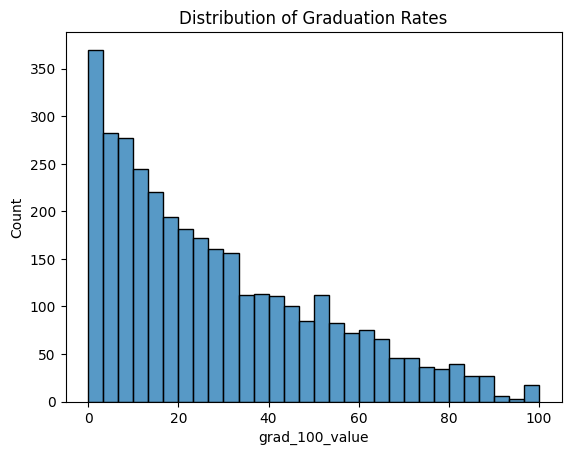

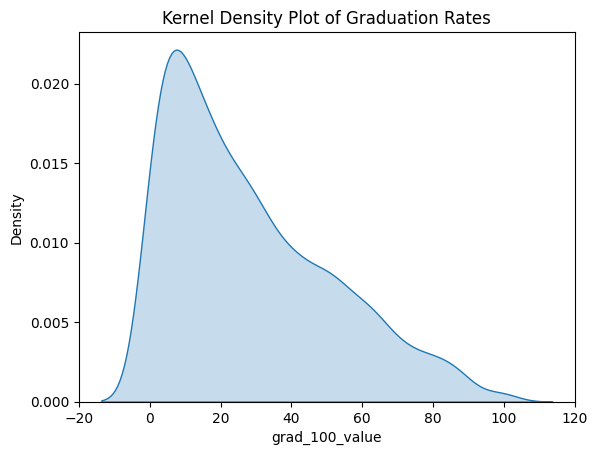

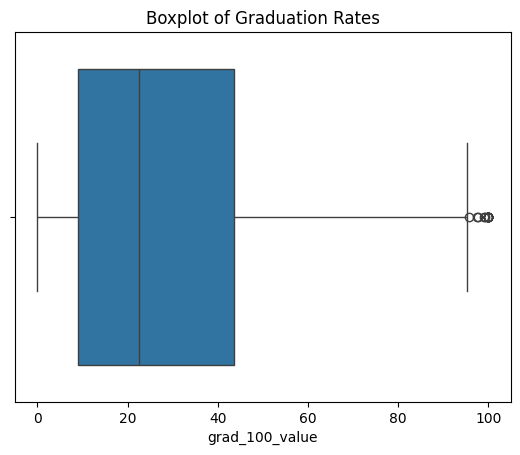

count    3467.000000
mean       28.364465
std        23.312730
min         0.000000
25%         9.000000
50%        22.500000
75%        43.650000
max       100.000000
Name: grad_100_value, dtype: float64


In [38]:
import seaborn as sns
import matplotlib.pyplot as plt

#histogram
sns.histplot(df['grad_100_value'], bins=30, kde=False)
plt.title("Distribution of Graduation Rates")
plt.show()

#kde
sns.kdeplot(df['grad_100_value'], fill=True)
plt.title("Kernel Density Plot of Graduation Rates")
plt.show()

#boxplot
sns.boxplot(x=df['grad_100_value'])
plt.title("Boxplot of Graduation Rates")
plt.show()

#statistical summary
print(df['grad_100_value'].describe())

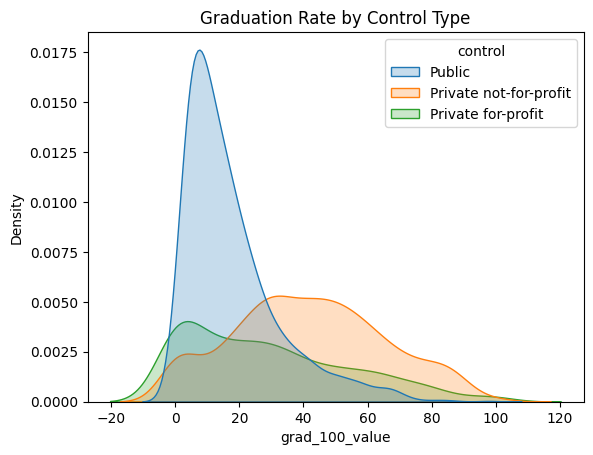

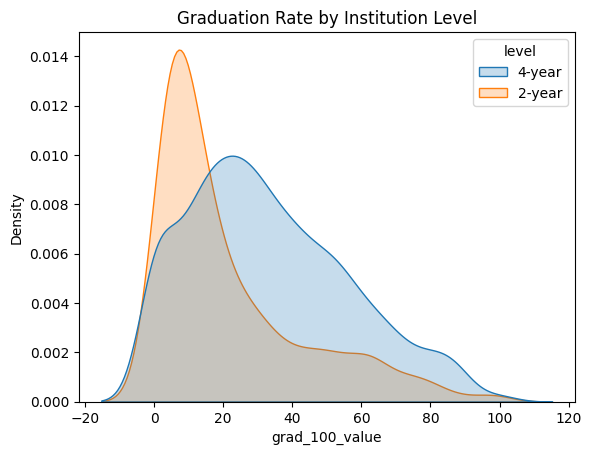

                                count       mean        std  min     25%  \
level  control                                                             
2-year Private for-profit       461.0  37.197614  25.497380  0.0  15.800   
       Private not-for-profit    68.0  41.913235  28.348302  0.0  16.225   
       Public                   926.0  12.400000  10.893600  0.0   5.100   
4-year Private for-profit       318.0  17.382704  20.788525  0.0   0.000   
       Private not-for-profit  1121.0  41.645674  23.243453  0.0  25.000   
       Public                   573.0  25.561082  16.403902  0.0  13.600   

                                50%     75%    max  
level  control                                      
2-year Private for-profit      33.9  57.800  100.0  
       Private not-for-profit  44.4  61.200  100.0  
       Public                   9.4  16.175   97.8  
4-year Private for-profit      12.5  26.325  100.0  
       Private not-for-profit  41.0  57.800  100.0  
       Public       

In [37]:
#kde by control
sns.kdeplot(data=df, x='grad_100_value', hue='control', fill=True)
plt.title("Graduation Rate by Control Type")
plt.show()

#kde by level
sns.kdeplot(data=df, x='grad_100_value', hue='level', fill=True)
plt.title("Graduation Rate by Institution Level")
plt.show()

#statistical description by group
print(df.groupby(['level', 'control'])['grad_100_value'].describe())

#Private institutions tend to have higher graduation rates than public, and 4-year institiutions tend to have higher graduation rates than 2-year institutions

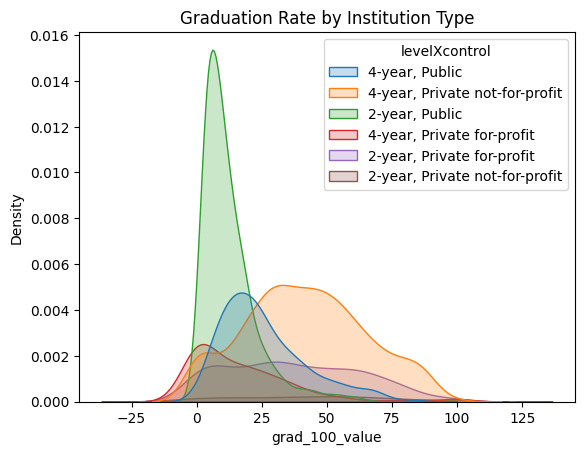

In [36]:
#new column levelXcontrol
df['levelXcontrol']=df['level']+', '+df['control']

sns.kdeplot(data=df, x='grad_100_value', hue='levelXcontrol', fill=True)
plt.title("Graduation Rate by Institution Type")

#overall, 4-year private not-for-profit institutions tend to have the highest graduation rates

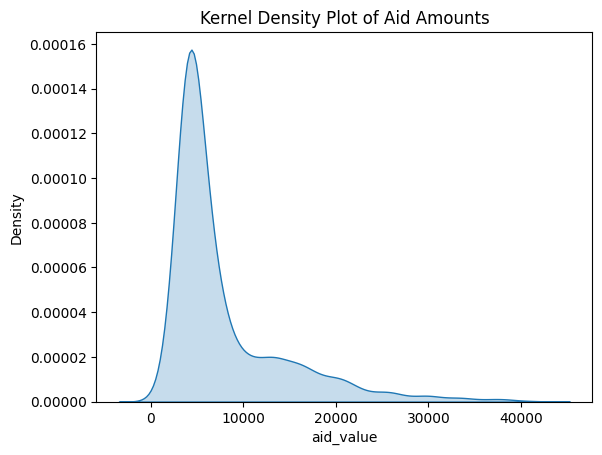

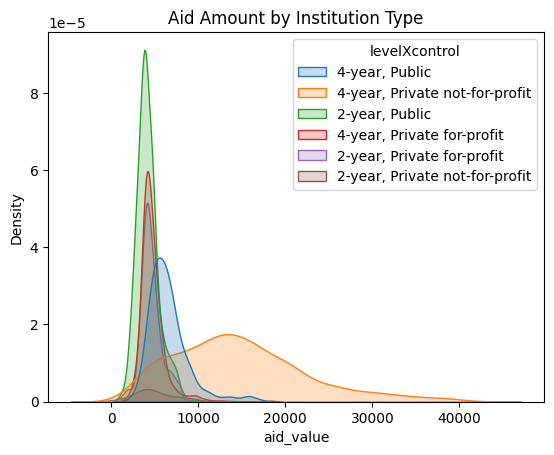

                                count          mean          std     min  \
level  control                                                             
2-year Private for-profit       464.0   4559.681034  1286.688269   294.0   
       Private not-for-profit    68.0   5128.058824  2590.449946   934.0   
       Public                   926.0   4126.199784  1260.271382   881.0   
4-year Private for-profit       527.0   4696.062619  1489.410020  1580.0   
       Private not-for-profit  1180.0  14702.401695  7649.775203   902.0   
       Public                   632.0   6514.071203  2353.716693  2232.0   

                                   25%      50%       75%      max  
level  control                                                      
2-year Private for-profit      3818.75   4286.5   5122.00   9727.0  
       Private not-for-profit  3650.00   4516.5   6311.50  13654.0  
       Public                  3311.25   3943.5   4762.00   9809.0  
4-year Private for-profit      3885.50   4364.

In [40]:
#kde for aid_value
sns.kdeplot(df['aid_value'], fill=True)
plt.title("Kernel Density Plot of Aid Amounts")
plt.show()

#grouped kde by level and control
sns.kdeplot(data=df, x='aid_value', hue='levelXcontrol', fill=True)
plt.title("Aid Amount by Institution Type")
plt.show()

#statistical summary
print(df.groupby(['level', 'control'])['aid_value'].describe())


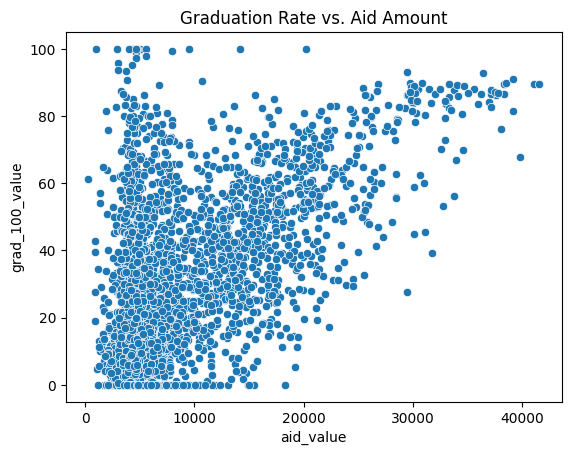

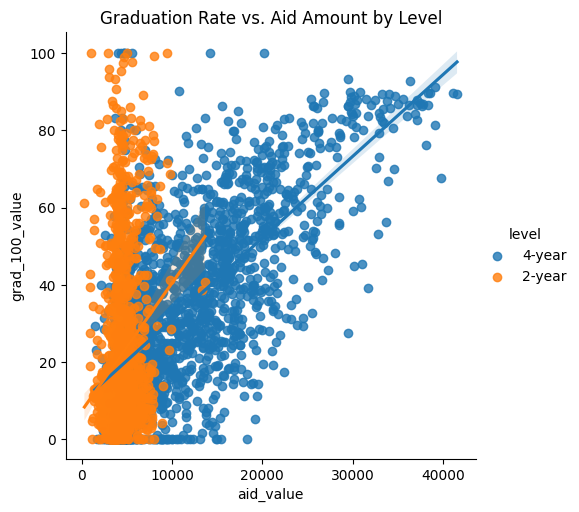

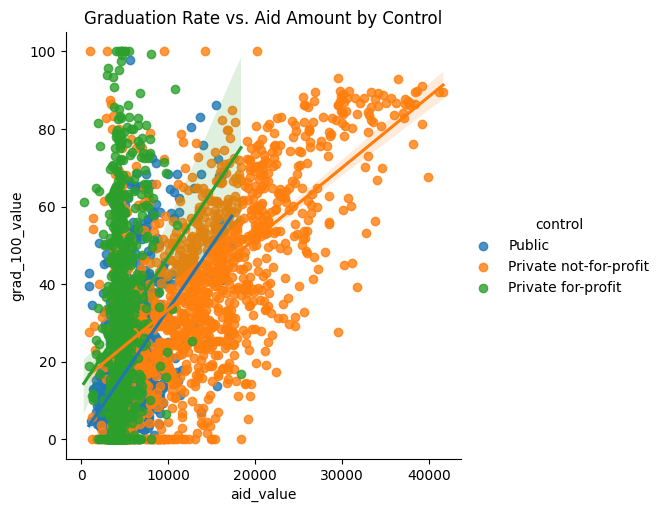

In [42]:
#aid value scatterplot
sns.scatterplot(x=df['aid_value'], y=df['grad_100_value'])
plt.title("Graduation Rate vs. Aid Amount")
plt.show()

#grouped Scatterplot by level
sns.lmplot(data=df, x='aid_value', y='grad_100_value', hue='level')
plt.title("Graduation Rate vs. Aid Amount by Level")
plt.show()

#grouped Scatterplot by control
sns.lmplot(data=df, x='aid_value', y='grad_100_value', hue='control')
plt.title("Graduation Rate vs. Aid Amount by Control")
plt.show()

#aid appears to be higher for private than public institutions, which may increase their graduation rates
